# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.128538, W: 0.380431, b: -0.114308
step: 100, loss: 0.122636, W: 0.372843, b: -0.060507
step: 150, loss: 0.117408, W: 0.365701, b: -0.009876
step: 200, loss: 0.112779, W: 0.358980, b: 0.037773
step: 250, loss: 0.108678, W: 0.352655, b: 0.082613
step: 300, loss: 0.105047, W: 0.346703, b: 0.124812
step: 350, loss: 0.101831, W: 0.341101, b: 0.164524
step: 400, loss: 0.098983, W: 0.335830, b: 0.201896
step: 450, loss: 0.096461, W: 0.330869, b: 0.237067
step: 500, loss: 0.094227, W: 0.326201, b: 0.270165
step: 550, loss: 0.092249, W: 0.321807, b: 0.301313
step: 600, loss: 0.090496, W: 0.317672, b: 0.330625
step: 650, loss: 0.088945, W: 0.313781, b: 0.358211
step: 700, loss: 0.087570, W: 0.310120, b: 0.384171
step: 750, loss: 0.086353, W: 0.306674, b: 0.408601
step: 800, loss: 0.085275, W: 0.303431, b: 0.431592
step: 850, loss: 0.084321, W: 0.300379, b: 0.453229
step: 900, loss: 0.083475, W: 0.297507, b: 0.473590
step: 950, loss: 0.082727, W: 0.294804, b: 0.492752
step: 1000

In [8]:
import matplotlib.pyplot as plt

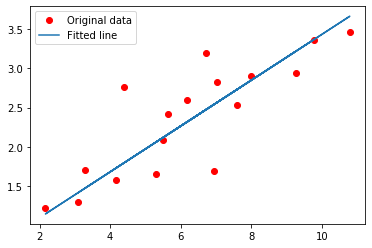

In [9]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()